In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/sample_data/income.csv')

In [ ]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


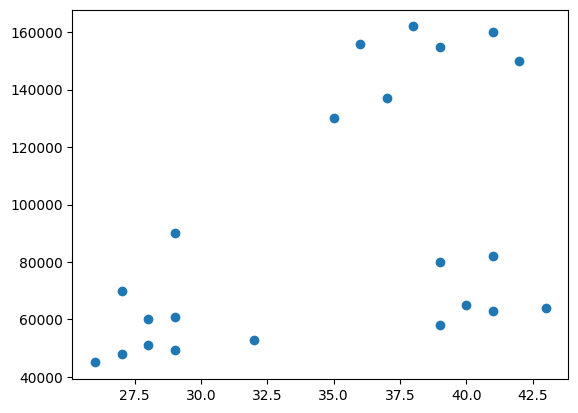

In [ ]:
plt.scatter(df['Age'],df['Income($)'])

In [ ]:
km= KMeans(n_clusters=3, random_state=0)

In [ ]:
df1= df[['Age','Income($)']]
df1

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [ ]:
predict_y= km.fit_predict(df1)
predict_y
#km.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [ ]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [ ]:
df['cluster']=predict_y
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


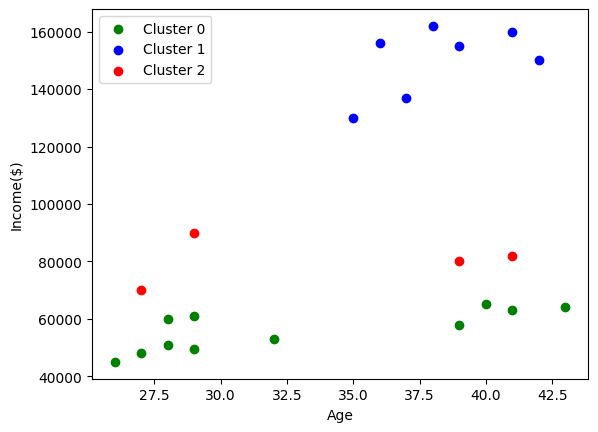

In [ ]:
df_c0= df[df.cluster==0]
df_c1=df[df.cluster==1]
df_c2=df[df.cluster==2]

plt.scatter(df_c0['Age'], df_c0['Income($)'], label='Cluster 0', color='green')
plt.scatter(df_c1['Age'], df_c1['Income($)'], label='Cluster 1',color='blue')
plt.scatter(df_c2['Age'], df_c2['Income($)'], label='Cluster 2',color='red')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [ ]:
#Clusters are formed properly, scaling is required

scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df[['Income($)']]= scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [ ]:
scaler.fit(df[['Age']])
df[['Age']]= scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [ ]:
km= KMeans(n_clusters=3, random_state=0)

In [ ]:
df1= df[['Age','Income($)']]

In [ ]:
predict_y = km.fit_predict(df1)
predict_y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['New_clusters']=predict_y
df

,Name,Age,Income($),cluster,New_clusters
0,Rob,0.058824,0.213675,2,0
1,Michael,0.176471,0.384615,2,0
2,Mohan,0.176471,0.136752,0,0
3,Ismail,0.117647,0.128205,0,0
4,Kory,0.941176,0.897436,1,1
5,Gautam,0.764706,0.940171,1,1
6,David,0.882353,0.982906,1,1
7,Andrea,0.705882,1.000000,1,1
8,Brad,0.588235,0.948718,1,1
9,Angelina,0.529412,0.726496,1,1


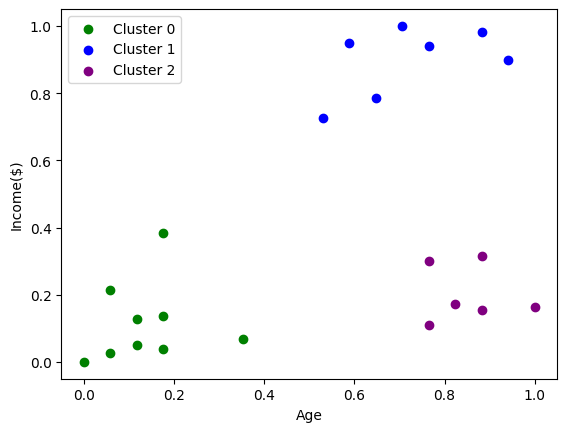

In [ ]:
df_c0= df[df.New_clusters==0]
df_c1=df[df.New_clusters==1]
df_c2=df[df.New_clusters==2]

plt.scatter(df_c0['Age'], df_c0['Income($)'], label='Cluster 0', color='green')
plt.scatter(df_c1['Age'], df_c1['Income($)'], label='Cluster 1',color='blue')
plt.scatter(df_c2['Age'], df_c2['Income($)'], label='Cluster 2',color='purple')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [ ]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

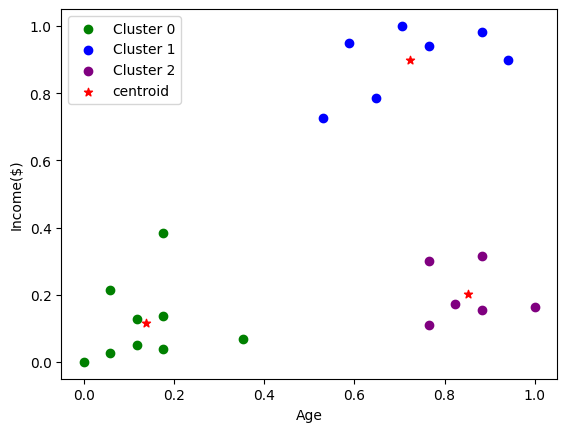

In [ ]:
df_c0= df[df.New_clusters==0]
df_c1=df[df.New_clusters==1]
df_c2=df[df.New_clusters==2]

plt.scatter(df_c0['Age'], df_c0['Income($)'], label='Cluster 0', color='green')
plt.scatter(df_c1['Age'], df_c1['Income($)'], label='Cluster 1',color='blue')
plt.scatter(df_c2['Age'], df_c2['Income($)'], label='Cluster 2',color='purple')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='red', marker='*', label ='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [ ]:
#Elbow method
#Calculate Sum of Square Error(SSE)

k_range=range(1,10)
sse=[]
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

sse

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2621792762345213,
 0.2250859596222327,
 0.1685851223602976,
 0.13265419827245162,
 0.1038375258660356]

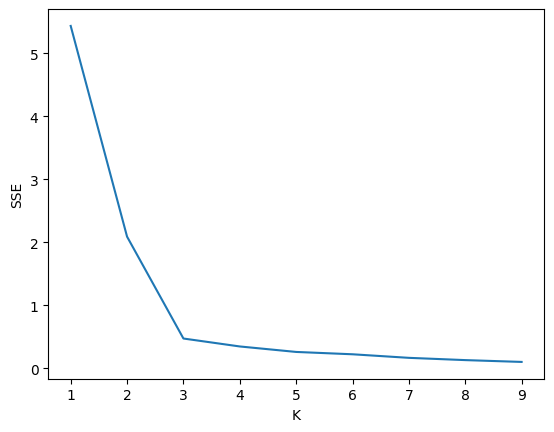

In [ ]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range,sse)

>> ACTIVITY -2 <br>
Take IRIS dataset. Consider only two colums petal length and petal width. Now apply kmeans clustering.